#### Preprocessing CIFAR10 dataset

In [1]:
import torch
import torchvision
# Download and load the training dataset
trainset = torchvision.datasets.CIFAR10(root='./cifar/train', train=True, download=True)

/data/rech/huiyuche/envs/bgpt/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 170498071/170498071 [00:01<00:00, 85260652.79it/s]


Extracting ./cifar/train/cifar-10-python.tar.gz to ./cifar/train


#### Preprocessing AgNews

In [ ]:
import pandas as pd

# Path to your .parquet file
file_path = '/data/rech/huiyuche/bgpt_2/ag_news/train/train-00000-of-00001.parquet'

# Load the file into a DataFrame
df = pd.read_parquet(file_path)

df = df.sample(n=1000, random_state=42)
# Display the data
print(df.head())
print(df.shape)


# iterate over text column. save each text to a file called '{index}.txt'

for index, row in df.iterrows():
    with open(f'/data/rech/huiyuche/bgpt_2/ag_news/train/{index}.txt', 'w', encoding= "utf-8") as f:
        f.write(row['text'])

# print the average of the length of the text column
print(df['text'].apply(len).mean())

#### BFD & Corr

In [42]:
from utils import *
import os
import sys
import importlib
importlib.reload(sys.modules['utils'])
from utils import *

#read_file_list



In [43]:

ByteFrequencyDistribution().get_BFD_Corr_plots(
    "txt",
    "/data/rech/huiyuche/bgpt_2/ag_news/train",
    "plots"
)

ByteFrequencyDistribution().get_BFD_Corr_plots(
    "png",
    "/data/rech/huiyuche/bgpt_2/cifar/train",
    "plots"
)

['19240.txt', '35420.txt', '866.txt', '103248.txt', '7067.txt', '108476.txt', '88548.txt', '83145.txt', '55646.txt', '93689.txt', '1002.txt', '18987.txt', '95304.txt', '25087.txt', '71000.txt', '29618.txt', '116167.txt', '54159.txt', '16398.txt', '2110.txt', '86744.txt', '57662.txt', '65397.txt', '114559.txt', '34267.txt', '16785.txt', '82247.txt', '93534.txt', '106606.txt', '86164.txt', '68265.txt', '85071.txt', '58551.txt', '114988.txt', '72881.txt', '43690.txt', '55139.txt', '100908.txt', '71365.txt', '59654.txt', '68720.txt', '593.txt', '106440.txt', '93817.txt', '107358.txt', '67930.txt', '116888.txt', '72038.txt', '16264.txt', '16605.txt', '65445.txt', '26302.txt', '100501.txt', '27123.txt', '62338.txt', '10744.txt', '80670.txt', '7696.txt', '62371.txt', '74068.txt', '62066.txt', '201.txt', '88618.txt', '6359.txt', '102052.txt', '69990.txt', '49493.txt', '104858.txt', '111992.txt', '53321.txt', '32184.txt', '9286.txt', '40471.txt', '13664.txt', '114609.txt', '10317.txt', '109424.

In [17]:
corr, corr_new, BFD = ByteFrequencyDistribution().get_fingerprint_by_folder("/data/rech/huiyuche/bgpt_2/ag_news/train")

['19240.txt', '35420.txt', '866.txt', '103248.txt', '7067.txt', '108476.txt', '88548.txt', '83145.txt', '55646.txt', '93689.txt', '1002.txt', '18987.txt', '95304.txt', '25087.txt', '71000.txt', '29618.txt', '116167.txt', '54159.txt', '16398.txt', '2110.txt', '86744.txt', '57662.txt', '65397.txt', '114559.txt', '34267.txt', '16785.txt', '82247.txt', '93534.txt', '106606.txt', '86164.txt', '68265.txt', '85071.txt', '58551.txt', '114988.txt', '72881.txt', '43690.txt', '55139.txt', '100908.txt', '71365.txt', '59654.txt', '68720.txt', '593.txt', '106440.txt', '93817.txt', '107358.txt', '67930.txt', '116888.txt', '72038.txt', '16264.txt', '16605.txt', '65445.txt', '26302.txt', '100501.txt', '27123.txt', '62338.txt', '10744.txt', '80670.txt', '7696.txt', '62371.txt', '74068.txt', '62066.txt', '201.txt', '88618.txt', '6359.txt', '102052.txt', '69990.txt', '49493.txt', '104858.txt', '111992.txt', '53321.txt', '32184.txt', '9286.txt', '40471.txt', '13664.txt', '114609.txt', '10317.txt', '109424.

In [18]:
# transform corr (a dataframe) to numpy array
import numpy as np
np.set_printoptions(threshold=np.inf)
corr_np = corr.to_numpy()
print(np.isnan(corr_np).sum())
corr.fillna(-0.5, inplace=True)

58975


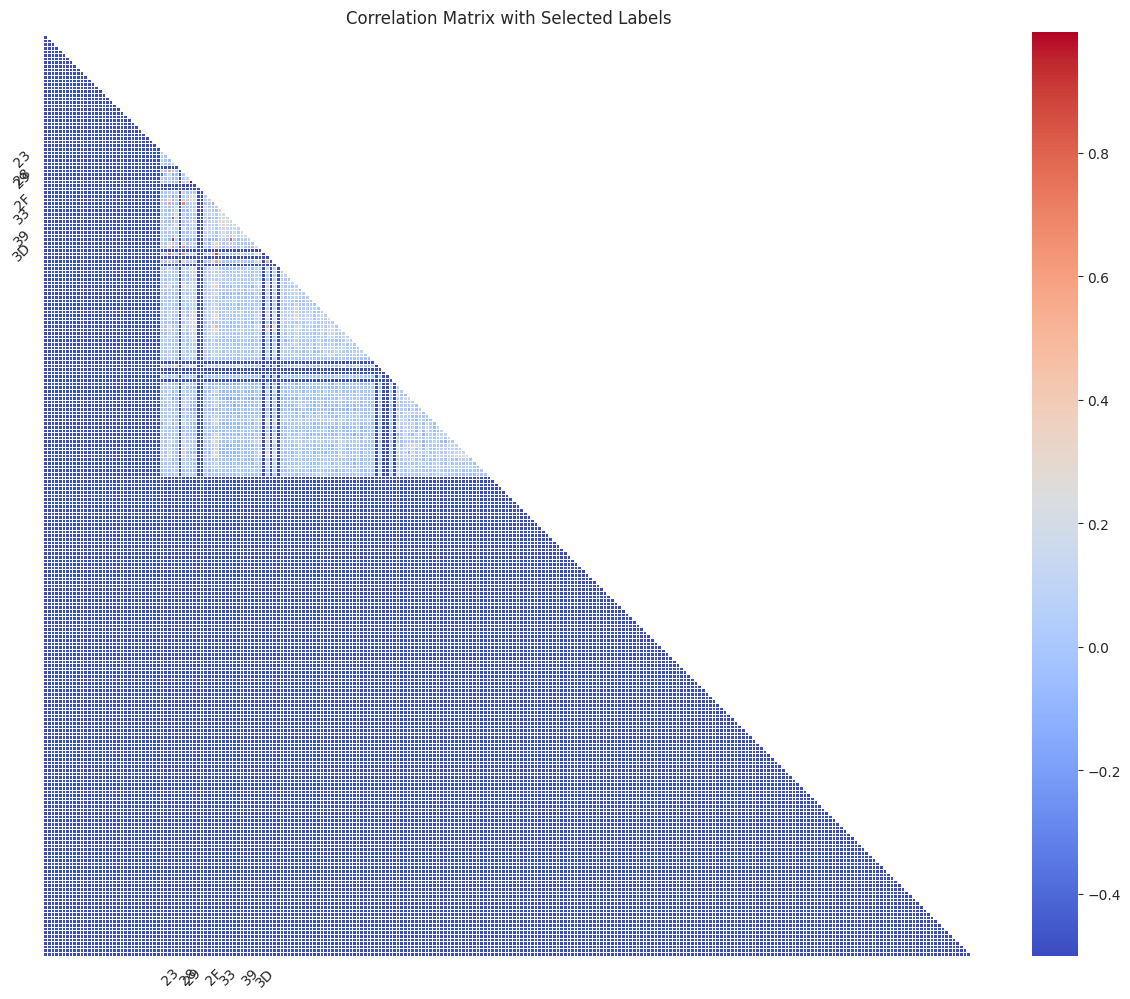

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# all values > 0.5 
result = [(column, index) for column in upper.columns for index in upper.index if upper[column][index] > 0.7]


# variable names
variable_names = set([name for pair in result for name in pair])

#  get all ticks positions
all_ticks = np.arange(len(corr.columns))

#  only keep the ticks of variables with correlation > 0.5
filtered_ticks = [i for i, col in enumerate(corr.columns) if col in variable_names]

# Only display labels greater than 0.5, and set other labels to empty strings
xticks_labels = ['' if i not in filtered_ticks else corr.columns[i] for i in all_ticks]
yticks_labels = ['' if i not in filtered_ticks else corr.index[i] for i in all_ticks]


# generate a plot with fixed size: 15*12
plt.figure(figsize=(15,12))


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot=False, fmt=".2f", cmap='coolwarm', linewidths=0.5)
# Draw the heatmap with the mask and correct aspect ratio
plt.title('Correlation Matrix with Selected Labels')
plt.xticks(ticks=all_ticks, labels=xticks_labels, rotation=45)
plt.yticks(ticks=all_ticks, labels=yticks_labels, rotation=45)
plt.show()





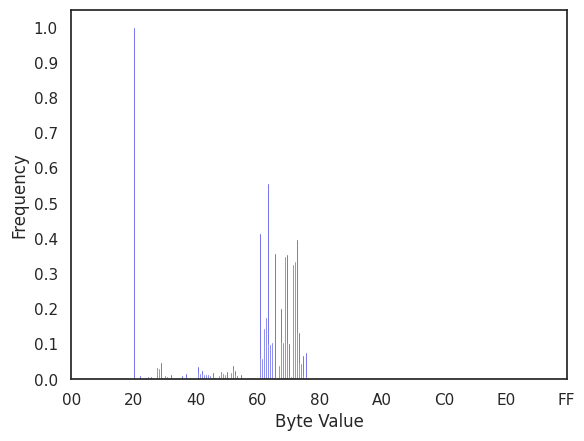

In [81]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
df = pd.DataFrame(list(average_byte_frequency_table.items()), columns=['Byte Value', 'Frequency'])
sns.barplot(
        x='Byte Value',              # x-axis represents byte values (from 00 to FF)
        y='Frequency',         # y-axis represents their corresponding frequency in percentage
        data=df,               # data source is our DataFrame created from the frequency table
        width=1,
        color='blue',           # color of the bars

    )

# Define the specific x-ticks you want to show (e.g., 1, 32, 64, etc.)
xticks = list(range(0,256,32)) + [255]

# Set the x-ticks as well as y-ticks to only show those values
plt.xticks(ticks=xticks)
plt.yticks(ticks=list(np.arange(0, 1.01, 0.1)))


# set y axis to log scale
# plt.yscale('log')
plt.show()



                                                    text  label
71787  BBC set for major shake-up, claims newspaper L...      2
67218  Marsh averts cash crunch Embattled insurance b...      2
54066  Jeter, Yankees Look to Take Control (AP) AP - ...      1
7168   Flying the Sun to Safety When the Genesis caps...      3
29618  Stocks Seen Flat as Nortel and Oil Weigh  NEW ...      2
(1000, 2)
236.701


In [59]:
16*512

8192

NameError: name 'sinplot' is not defined

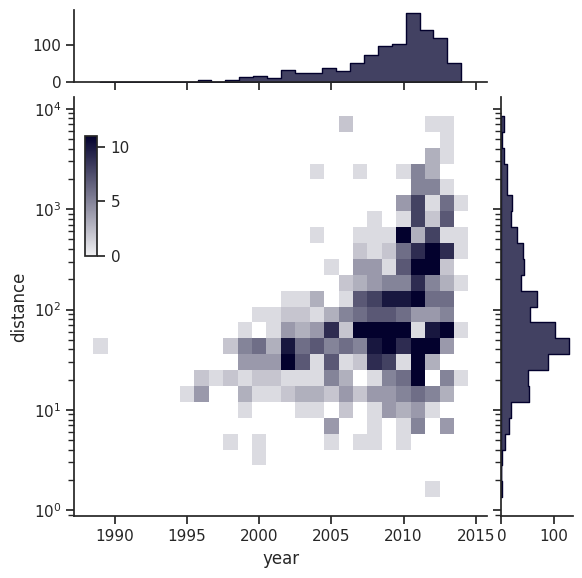

In [19]:

import seaborn as sns
sns.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
planets = sns.load_dataset("planets")
g = sns.JointGrid(data=planets, x="year", y="distance", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .#55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")
sinplot()

<ipython-input-16-e12393d4d454>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


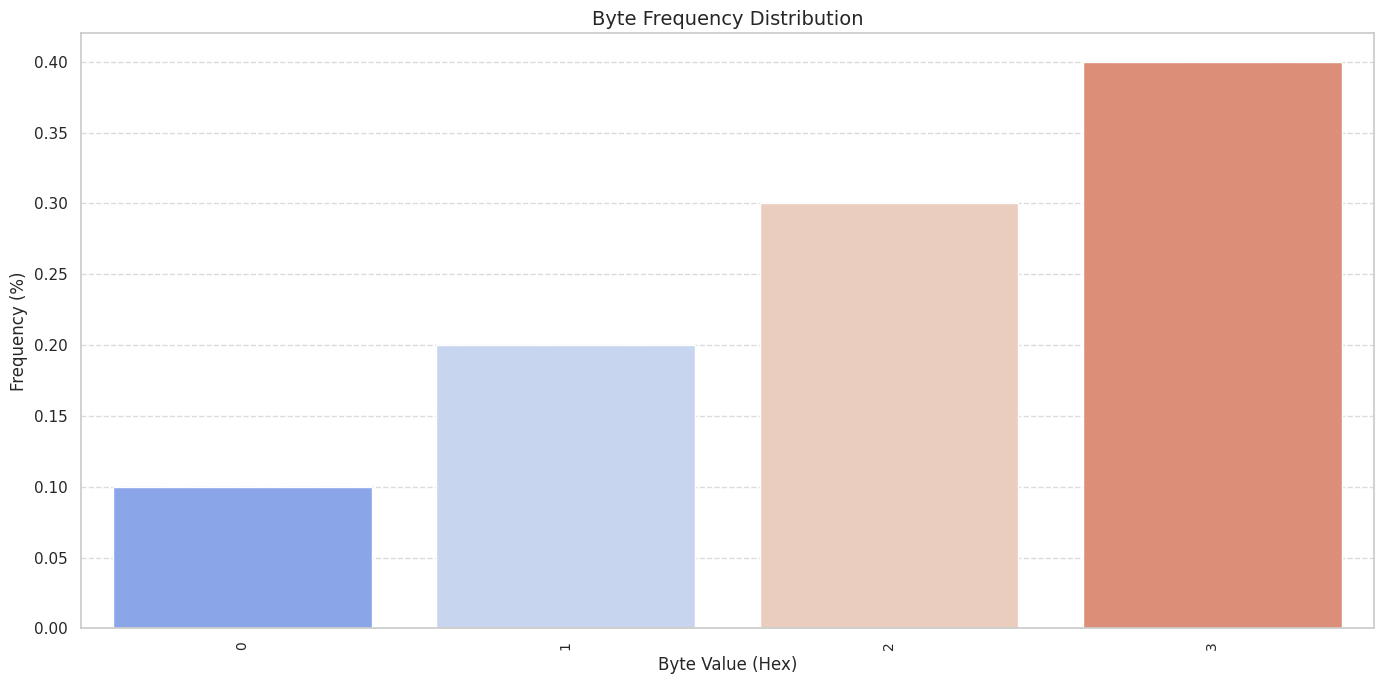

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_byte_frequency_seaborn(frequency_table):
    # Convert frequency_table (dictionary) to a pandas DataFrame
    # This makes it easier to use seaborn for plotting
    df = pd.DataFrame(list(frequency_table.items()), columns=['Byte', 'Frequency'])

    # Set the aesthetic style of the plot for a cleaner look
    sns.set(style="whitegrid")

    # Create a larger figure size for better readability (especially with 256 values)
    plt.figure(figsize=(14, 7))

    # Create a seaborn barplot
    sns.barplot(
        x='Byte',              # x-axis represents byte values (from 00 to FF)
        y='Frequency',         # y-axis represents their corresponding frequency in percentage
        data=df,               # data source is our DataFrame created from the frequency table
        palette='coolwarm'     # a color palette that visually differentiates byte values
    )

    # Annotating the plot: Add labels and title
    plt.xlabel('Byte Value (Hex)', fontsize=12)   # x-axis label with custom font size
    plt.ylabel('Frequency (%)', fontsize=12)      # y-axis label
    plt.title('Byte Frequency Distribution', fontsize=14)  # Title of the plot

    # Rotate x-axis labels by 90 degrees to prevent overlap since there are 256 byte values
    plt.xticks(rotation=90, fontsize=10)          # Rotate and adjust the font size of the labels

    # Adding gridlines to the plot for better readability of frequency levels
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Dashed gridlines along the y-axis

    # Display the plot with a tight layout to ensure no cut-off labels
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_byte_frequency_seaborn({0: 0.1, 1: 0.2, 2: 0.3, 3: 0.4})
# Example Usage (assuming `frequency_table` is available from your function):
# frequency_table = obj.get_byte_frequency_table_by_byte_list(byte_stream)
# plot_byte_frequency_seaborn(frequency_table)